In [1]:
# Module Importations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Constants
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout = True)
plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 14,
    titlepad = 10,
)

In [3]:
# Load Datasets
accidents = pd.read_csv(r'C:\Developer\scratch-pad-python\Datasets\US_Accidents_Dec20.csv')
autos = pd.read_csv(r'C:\Developer\scratch-pad-python\Datasets\Automobile_data.csv')
concrete = pd.read_excel(r'C:\Developer\scratch-pad-python\Datasets\Concrete_Data.xls')
customer = pd.read_csv(r'C:\Developer\scratch-pad-python\Datasets\Customer-Value-Analysis.csv')

In [4]:
# Mathematical Transforms - Relationships in mathematical forms

# Deriving stroke ratio
def return_stroke_ratio(stroke, bore):
    try:
        # Convert data type
        stroke = float(stroke)
        bore = float(bore)

        # Calculate stroke ratio 
        stroke_ratio = stroke / bore

    # Handle conversions that fail gracefully
    except:
        stroke_ratio = 0

    return stroke_ratio 

autos['stroke_ratio'] = autos.apply(lambda row: return_stroke_ratio(row['stroke'], row['bore']), axis = 1) # Research identifies stroke ratio as useful parameter

autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.4,3.19,1.065831
4,3.4,3.19,1.065831


In [5]:
# Mathematical Transforms - Relationships in mathematical forms

# Deriving displacement
def return_displacement(stroke, bore, num_of_cylinders):
    try:
        # Convert data types
        stroke = float(stroke)
        bore = float(bore)
        cylinders_int = 0

        numbers_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "ten": 10, "twelve": 12}
        for key, value in numbers_dict.items():
            if num_of_cylinders == key:
                cylinders_int = value

        # Calculate displacement
        displacement = np.pi * ((0.5 * bore) ** 2) * stroke * cylinders_int

    # Handle conversions that fail
    except:
        displacement = 0

    return displacement

autos['displacement'] = autos.apply(lambda row: return_displacement(row['stroke'], row['bore'], row['num-of-cylinders']), axis = 1) # Displacement can also be a useful parameter

autos[['stroke', 'bore', 'num-of-cylinders', 'displacement']].head()

,stroke,bore,num-of-cylinders,displacement
0,2.68,3.47,four,101.377976
1,2.68,3.47,four,101.377976
2,3.47,2.68,six,117.446531
3,3.4,3.19,four,108.695147
4,3.4,3.19,five,135.868934


In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

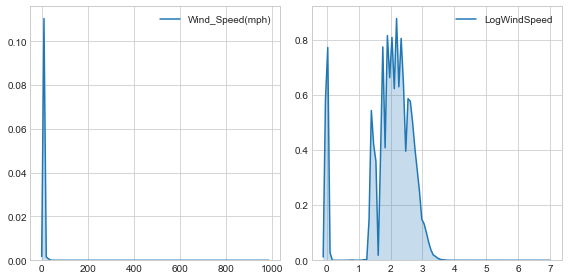

In [7]:
# Visualising Data

# Transforming zero values for accidents windspeed

# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents['Wind_Speed(mph)'].apply(np.log1p)

accidents.head()

# Plot a comparison
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.kdeplot(accidents['Wind_Speed(mph)'], shade = True, ax = axes[0])
sns.kdeplot(accidents['LogWindSpeed'], shade = True, ax = axes[1])

In [8]:
# Counts (Aggregating feature sets by creating a count)

# Roadway features list
roadway_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

# Count roadway features and add as feature
accidents['Roadway_Features'] = accidents[roadway_features].sum(axis = 1)

accidents[roadway_features + ['Roadway_Features']].head(10)

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Roadway_Features
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,True,1
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,True,1
5,False,False,False,False,False,False,False,False,False,False,False,False,0
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,False,False,False,False,False,False,False,False,False,False,0
8,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [9]:
# Counts (Aggregating feature sets by creating a count)

# Using dataframe's built-in method

# Calculating number of components in concrete
components = [
    'Cement (component 1)(kg in a m^3 mixture)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Fly Ash (component 3)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)'
    ]

# Count number of components and add as feature
concrete['Components'] = concrete[components].gt(0).sum(axis = 1)

concrete[components + ['Components']].head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [12]:
# Breaking Down Features - Splitting strings into new features

# Creating two new features from the policy feature
customer[['Type', 'Level']] = (
    customer['Policy'].str.split(" ", expand = True)
)

customer[['Policy', 'Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [15]:
# Building up features - Combining features
autos['make-and-style'] = autos['make'] + '_' + autos['body-style']

autos[['make', 'body-style', 'make-and-style']].head(10)

,make,body-style,make-and-style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan
5,audi,sedan,audi_sedan
6,audi,sedan,audi_sedan
7,audi,wagon,audi_wagon
8,audi,sedan,audi_sedan
9,audi,hatchback,audi_hatchback


In [17]:
# Group Transforms - Aggregating information across multiple rows grouped by some category

# Determining average income by state
customer['AverageIncome'] = (
    customer.groupby('State')   # for each state
    ['Income']                  # select the income
    .transform('mean')          # and compute the mean
)

customer[['State', 'Income', 'AverageIncome']].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [18]:
# Group Transforms - Aggregating information across multiple rows grouped by some category

# Calculating the frequency of each state as a percentage
customer['StateFrequency'] = (
    customer.groupby('State')   # for each state
    ['State']                   # select the state
    .transform('count')         # and count it up
    / customer.State.count()    # and divide by total state count
)

customer[['State', 'StateFrequency']].head(10)

,State,StateFrequency
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [ ]:
# Applying Grouped Features in train-validation splits

# Create splits

# Create the average claim amount by coverage type, on the training set

# Merge the values into the validation set

